# ECE 657A : Assignment 1 

# Importing Required Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 
%matplotlib inline

# Dataset 1 : Abalone Dataset

### Data Set Information:

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).


### Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem.

### Name / Data Type / Measurement Unit / Description
-----------------------------
- Sex / nominal / -- / M, F, and I (infant)

- Length / continuous / mm / Longest shell measurement

- Diameter / continuous / mm / perpendicular to length

- Height / continuous / mm / with meat in shell

- Whole weight / continuous / grams / whole abalone

- Shucked weight / continuous / grams / weight of meat

- Viscera weight / continuous / grams / gut weight (after bleeding)

- Shell weight / continuous / grams / after being dried

- Rings / integer / -- / +1.5 gives the age in years

# 1 : Load the dataset and explore the features and their ranges and distribution. Show a couple approaches you use.


### 1 (a) :  Loading the dataset.

In [60]:
# From the above description of the Abalone dataset. 
# Let's define the column names of the feature variables and the name of the target variable

feature_columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
target_column = ['Rings']
ordinal_column = ['Sex']
feature_columns_without_ordinal_column = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

In [61]:
abalone_data = pd.read_csv("abalone.csv")

In [62]:
# Let's check the first 5 rows of the Data to get some intuition
abalone_data.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [63]:
# Seems like the column names (feature names) are missing, let's add them 
column_names_abalone_data = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone_data.columns = column_names_abalone_data

In [64]:
# Let's check the dataset again
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


### 1 (b) : Exploring the features and their ranges and distribution.

In [65]:
# Let's try to find the shape of the dataframe
rows = abalone_data.shape[0]
columns = abalone_data.shape[1]

print(f"There are {rows} and {columns} in the abalone dataset, ie. the shape is ({rows}, {columns}) ")

There are 4176 and 9 in the abalone dataset, ie. the shape is (4176, 9) 


In [66]:
# Let's get some info about the dataset and the datatypes of each feature
abalone_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


In [67]:
# Let's try to find out the datatype of each feature (column) of the dataset.
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole weight    4176 non-null   float64
 5   Shucked weight  4176 non-null   float64
 6   Viscera weight  4176 non-null   float64
 7   Shell weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [10]:
# Let's figure out what different values are contained in the Sex column.
abalone_data['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

# 2 : Is there any missing data? Present evidence or refer to figures or to earlier tables or figures clearly (eg. by a figure/table name or by the jupyter line number).

In [11]:
# Seems like there are no missing values in the dataset. Let's check this.
print(f"Total number of rows or datapoints in the Abalone Dataset : {rows} \n")
abalone_data.isnull().sum()

Total number of rows or datapoints in the Abalone Dataset : 4176 



Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

### Insights gained from the description 

- The dataset doesn't contain any missing values
- The `Sex` column is a categorical variable with values `M` , `F` and `I`.
- Interesting thing to look for is that `Height` column has minimum value of `0.00000` which is weird (refer the abalone.describe() in 1(b)). 

# 3 : Compute the moments or summarization statistics on the data features. Comment on the diversity of data types and ranges of the features.

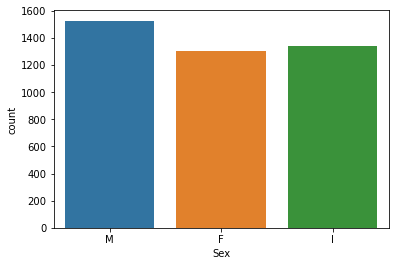

In [12]:
# Let's try to plot the number of Male, Infant and Female abalones in the given dataset.
sns.countplot(x='Sex', data=abalone_data);

Seems like the data is balanced in terms of the `Sex` feature as there are similar number of Male, Infant and Female abalones.

### Interesting quality about the `Age` of the Infant `Sex` in the dataset.

As we know, 
(Number of Rings of abalone) + 1.5 = Age of the abalone

Seems like many Infants have age >= 11.5 which is weird considering the definition of `infants` which means `a very young child or a baby`.

In [13]:
infants_with_rings_greater_than_ten = abalone_data.loc[(abalone_data['Sex'] == 'I') & (abalone_data['Rings'] > 10)] 
infants_with_rings_greater_than_ten[['Sex', 'Rings']]

,Sex,Rings
233,I,12
245,I,13
394,I,11
420,I,11
433,I,13
...,...,...
3930,I,17
4034,I,11
4037,I,11
4038,I,11


About 155 infants are older than 11.5 years.


#### Let's try to look at how the data is distributed for `Sex` in comparision to `Rings` (basically Age as we can derive the `Age` from the `Rings` column).

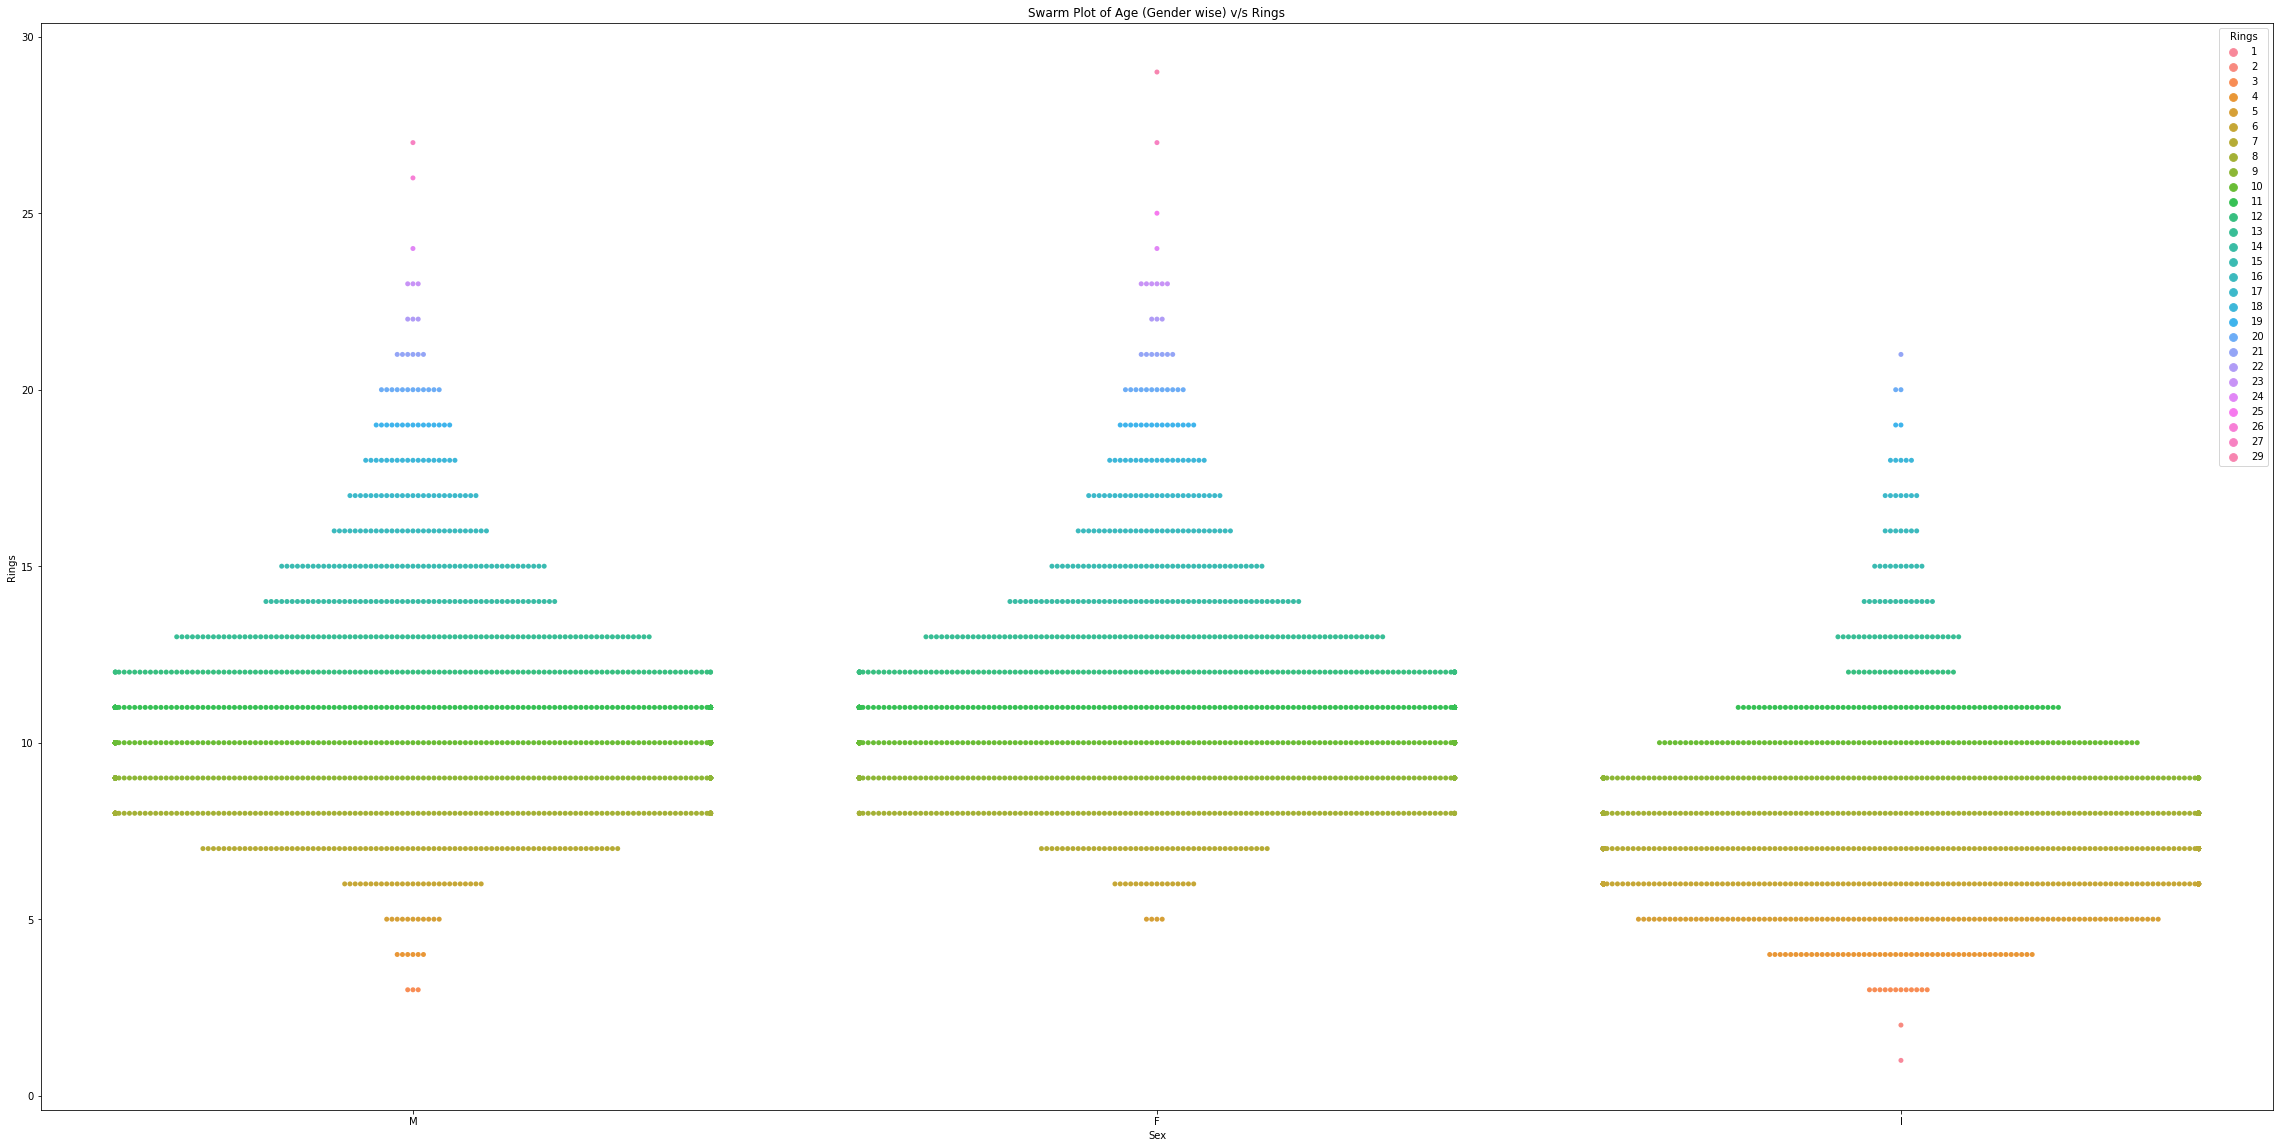

In [14]:
# The best way to look at this relationship is with the help of a swarm plot
plt.figure(figsize = (40,20))
plt.title("Swarm Plot of Age (Gender wise) v/s Rings")
sns.swarmplot(x = 'Sex', y = 'Rings', data = abalone_data, hue = 'Rings');
#sns.violinplot(x = 'Sex', y = 'age', data = a)

From the above plot we can clearly notice that,

- Infants are mostly in the Age range of 5-10.

- Males and Females are in the Age range of 10-15.

- Lowest Age is of Infant (2.5 years) and the Highest age is of a Female abalone (30.5 years).

### Let's look at the distribution of various features and their ranges

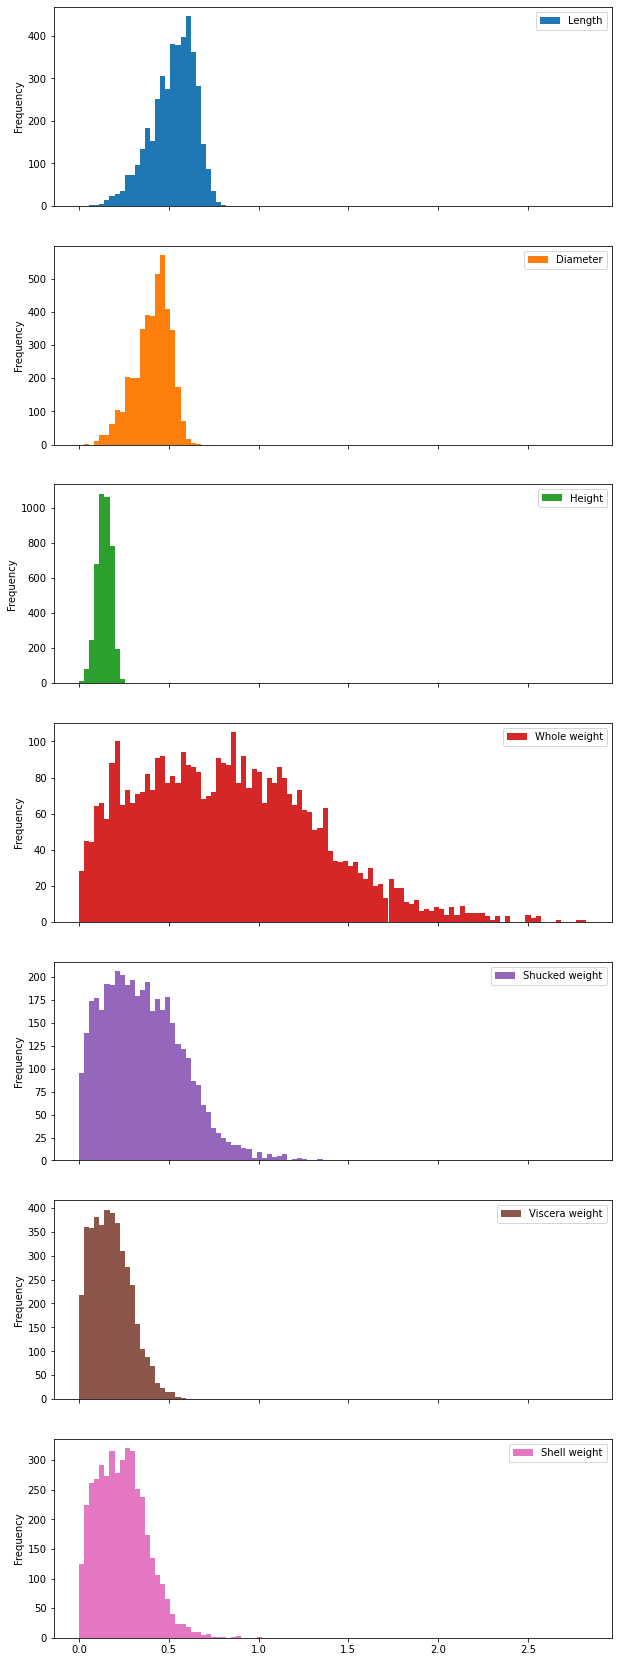

In [15]:
# Let's check the distribution of various features and their ranges
abalone_data[['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']].plot.hist(figsize=(10,30),subplots=True,bins=100);


Seems like, the `Sex`, `Length`, `Diameter` and `Height` follow somewhat normal distribution whereas the features `Whole weight`, `Shucked weight`, `Viscera weight` and `Shell weight` doesn't follow normal distribution.

# Performing Bivariate Analysis

Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them. [Source : Wikipedia]

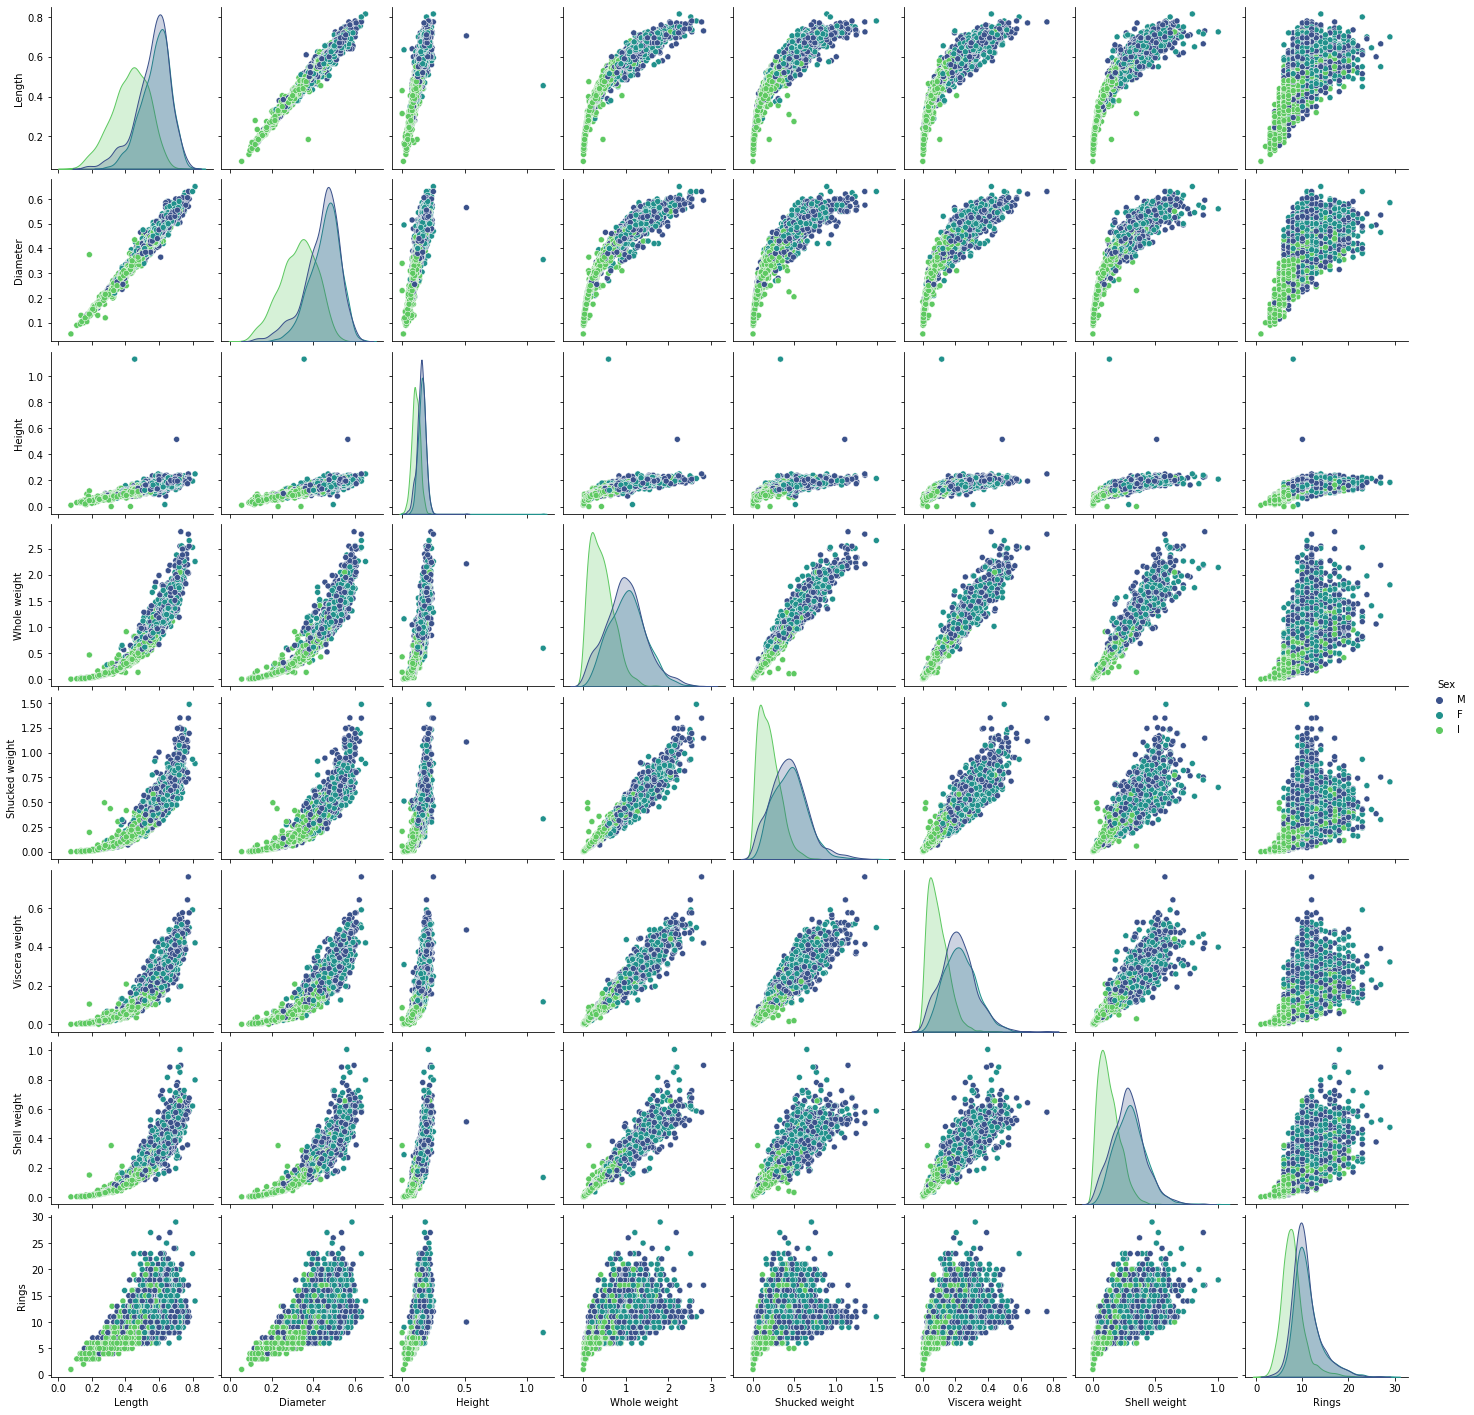

In [16]:
# Bivariate Analysis

sns.pairplot(abalone_data, hue = 'Sex', palette = 'viridis');

Bivariate Analysis provides evidence that features `Length` and `Diameter` are linearly correlated. Whereas `Whole weight` is correlated with `Shucked weight`, `Viscera weight` and `Shell weight`.

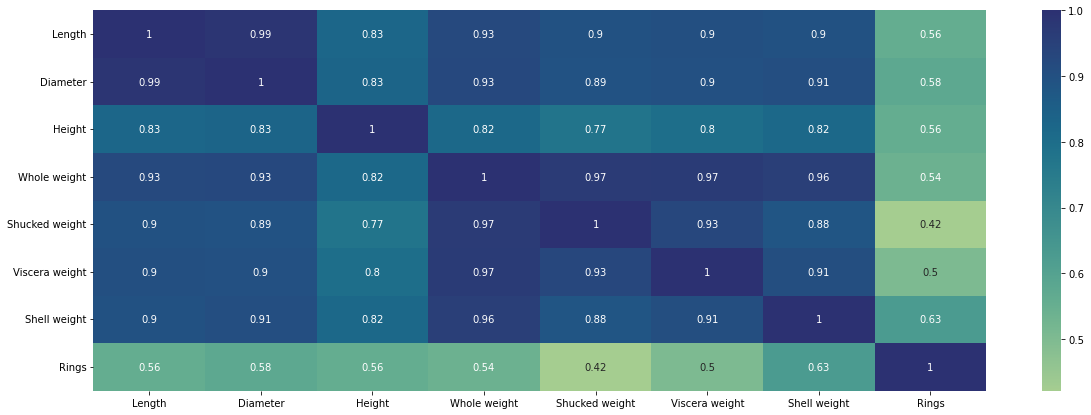

In [17]:
# Let's try to find out correlation with the help of Heatmap through visualisation.
plt.figure(figsize=(20,7))
sns.heatmap(abalone_data.corr(), annot=True, cmap="crest");

Hence, we can observe that `Rings` are highly correlated with `Shell weight` with correlation coefficient 0.63. Whereas `Rings` are least correlated with `Shucked weight` having correlation coefficient 0.42.

# 4 : Do there seem to be outliers that should be watched out for? Is it possible they are errors or just naturally occurring? How would you evaluate this?

### Outlier Detection

In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses. [Source : Wikipedia]




![title](Identification-of-outliers-left-box-plot-and-the-normal-distribution-of-observation.png)


### Why do we care about Outliers?

* Outliers badly affect mean and standard deviation of the dataset. These may statistically give erroneous results.
* It increases the error variance and reduces the power of statistical tests.
* If the outliers are non-randomly distributed, they can decrease normality.
* Most machine learning algorithms do not work well in the presence of outlier. So it is desirable to detect and remove outliers.
* They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.

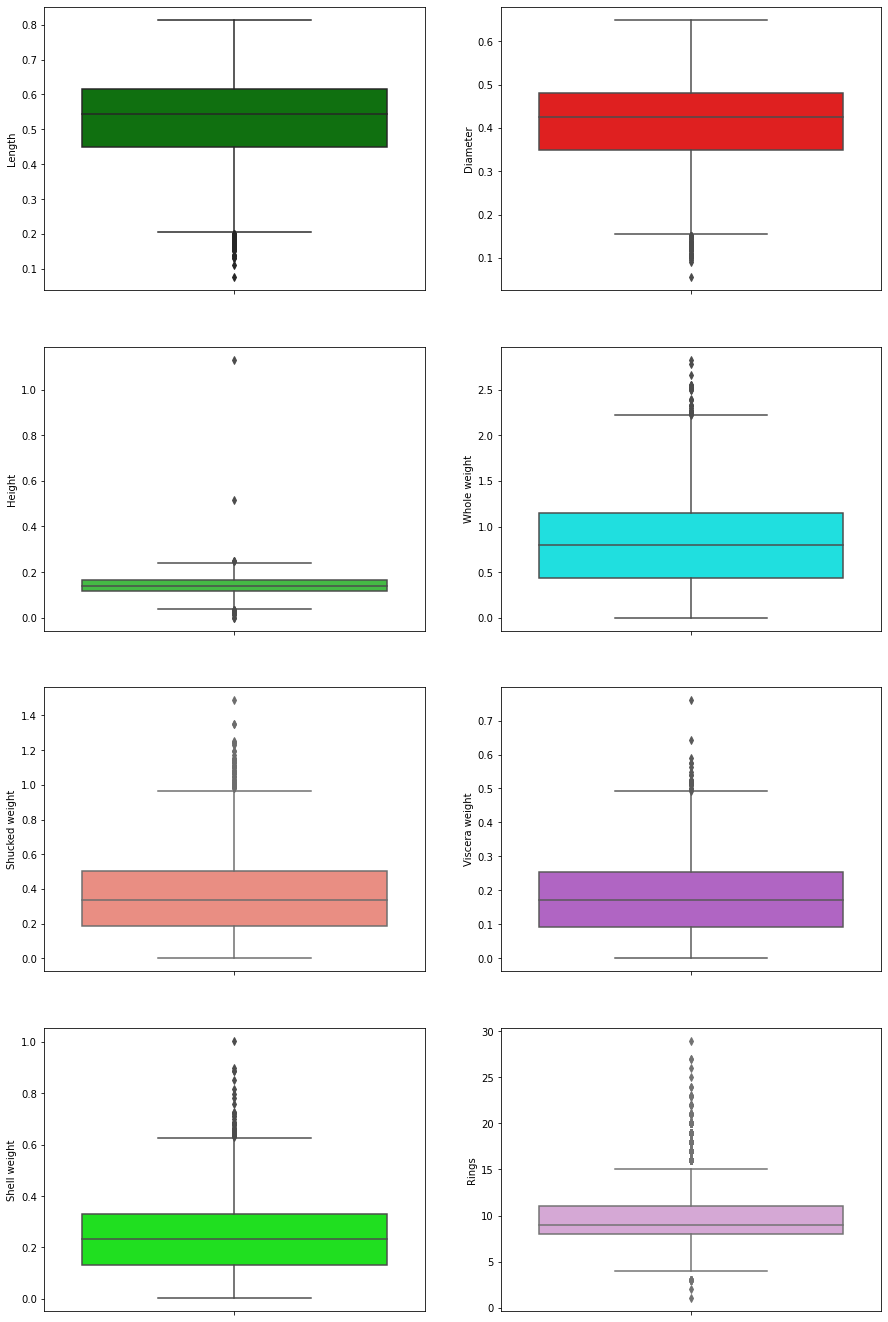

In [18]:
# We will try to detect Outliers with the help of BoxPlot.
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows= 4, ncols = 2, figsize = (15,24))
sns.boxplot(ax = ax1, y = 'Length', data = abalone_data, color = 'green')
sns.boxplot(ax = ax2, y = 'Diameter', data = abalone_data, color = 'red')
sns.boxplot(ax = ax3, y = 'Height', data = abalone_data, color = 'limegreen')
sns.boxplot(ax = ax4, y = 'Whole weight', data = abalone_data, color = 'cyan')
sns.boxplot(ax = ax5, y = 'Shucked weight', data = abalone_data, color = 'salmon')
sns.boxplot(ax = ax6, y = 'Viscera weight', data = abalone_data, color = 'mediumorchid')
sns.boxplot(ax = ax7, y = 'Shell weight', data = abalone_data, color = 'lime')
sns.boxplot(ax = ax8, y = 'Rings', data = abalone_data, color = 'plum');

### 4 (a) : Do there seem to be outliers that should be watched out for? Is it possible they are errors or just naturally occurring?


We can see that there are several Outliers in the feature columns. For example : In case of `Length` feature, the values below ~= 0.2 are considered as Outliers. The Outliers in the BoxPlot are indicated as dots which can be over the Top Horizontal line and below the Bottom Horizontal line.

- In the above case it might be possible due to some natural phenomena that an abalone infant might have very less `Length` at the time of birth and hence as it is not very common for other abalones it might be an Outlier.


- It is also possible, that while recording the characteristics of Abalone (collecting the data) there might be some errors. For example : `Height` of any abalone can't be `0`, but some abalone's height is 0 according to the dataset. 


- So, both natural occurence as well as errors can account for Outliers.

Outliers for other features can also be interpreted in the similar manner.


### 4 (b) : How would you evaluate this?

One way to evaluate the Outliers is to detect and remove them. There are several technique's to detect the Outliers.

- Z-Score method
- DBSCAN Clustering Technique
- InterQuartile Range (IQR) 
- and many more...


The boxplot uses the concept of IQR so let's discuss how to evaluate the outliers with IQR method, the below code uses IQR method and returns the Outliers it detected. Later we can remove them or transform them so that we can build a more robust model.


In [19]:
# IQR technique for Outlier detection, here we will detect Outliers for each feature except Sex.
def outlier_detection_with_iqr(data):
    
    for feature in data.columns:
        outliers = []
        q1 = data[feature].quantile(0.25)
        q3 = data[feature].quantile(0.75)
        iqr = q3-q1
        Lower_tail = q1 - 1.5 * iqr
        Upper_tail = q3 + 1.5 * iqr
        for i in data[feature]:
            if i > Upper_tail or i < Lower_tail:
                outliers.append(i)
        print(f"Outliers for {feature} feature:",outliers, "\n\n")
outlier_detection_with_iqr(abalone_data.drop('Sex', axis=1))


Outliers for Length feature: [0.175, 0.17, 0.075, 0.13, 0.11, 0.16, 0.2, 0.165, 0.19, 0.175, 0.2, 0.175, 0.155, 0.195, 0.165, 0.155, 0.18, 0.15, 0.16, 0.185, 0.195, 0.195, 0.2, 0.185, 0.14, 0.185, 0.135, 0.16, 0.13, 0.18, 0.165, 0.19, 0.17, 0.18, 0.175, 0.155, 0.2, 0.19, 0.18, 0.2, 0.2, 0.165, 0.19, 0.165, 0.175, 0.17, 0.14, 0.16, 0.185] 


Outliers for Diameter feature: [0.15, 0.15, 0.13, 0.13, 0.055, 0.1, 0.09, 0.12, 0.145, 0.12, 0.145, 0.125, 0.15, 0.14, 0.125, 0.11, 0.145, 0.11, 0.105, 0.125, 0.1, 0.11, 0.14, 0.12, 0.13, 0.15, 0.135, 0.105, 0.135, 0.13, 0.11, 0.15, 0.095, 0.13, 0.115, 0.13, 0.15, 0.125, 0.125, 0.135, 0.115, 0.145, 0.15, 0.14, 0.15, 0.135, 0.15, 0.145, 0.125, 0.13, 0.12, 0.15, 0.15, 0.125, 0.13, 0.105, 0.105, 0.12, 0.135] 


Outliers for Height feature: [0.01, 0.03, 0.03, 0.035, 0.03, 0.02, 0.035, 0.025, 0.025, 0.015, 0.0, 0.515, 0.25, 0.035, 0.25, 0.025, 1.13, 0.035, 0.015, 0.03, 0.03, 0.25, 0.025, 0.03, 0.025, 0.035, 0.035, 0.02, 0.0] 


Outliers for Whole weight 

# 5 : Is this a balanced dataset? If not, where is it unbalanced? Would the dataset still be usable?


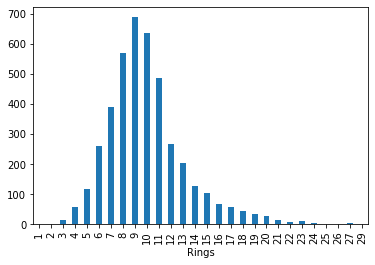

In [20]:
abalone_data.groupby(['Rings']).count()['Length'].plot.bar();

Mean value of Rings for Abalone Dataset is : 9.932471264367816
Standard Deviation for Rings column of Abalone Dataset is : 3.223601470760263


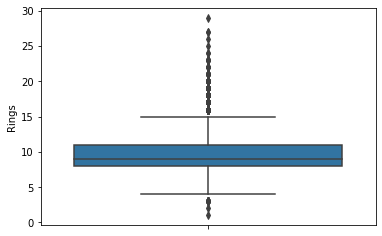

In [21]:
sns.boxplot(y=abalone_data['Rings']); 
print(f"Mean value of Rings for Abalone Dataset is : {abalone_data['Rings'].mean()}")
print(f"Standard Deviation for Rings column of Abalone Dataset is : {abalone_data['Rings'].std()}")


### 5 (a) : Is this a balanced dataset? If not, where is it unbalanced?
As, we can notice that most of the Datapoints provided in the dataset have the `Rings` in the range of 7 - 12, which means that most of the abalones in the dataset have Age range of 8.5-13.5 years. This can highly impact the training of the data on the Classification model as it will see maximum examples of `Rings` in between 7-12.

Whereas, there are very few examples of `Rings` between 1-6 and 13-29.

Thus, the dataset is unbalanced in terms of `Rings` feature.

Apart from that, it is also evident from the above boxplot that `Rings` lesser than 4 and greater than 15 are considered to be Outliers.

If we train the model on the given dataset, it may be highly biased towards some classes with higher datapoints than the other classes with few datapoints.

### 5 (b) : Would the dataset still be usable?

Yes, if we have almost similar number of datapoints for different classes. We can achieve a high accuracy as all the classes will have sufficient datapoints for the training of the Classifier model, resulting in more general model that helps in better prediction.


How the dataset can be more useable :
- One way is to collect more datapoints for the classes with fewer datapoints in the existing dataset and then combine the new data with exisiting data.

- Secondly, we can remove the Outliers and try to train and predict the remaining data as that can account as a better Classifier.

- Another way is to remove some datapoints from the classes that have access datapoints compared to other classes. This can help the model to generalise but not preferable to do so, because generally `"The more the data, the better...."`.

# Normalization


### Why to normalize prior to model fitting?


The main idea behind normalization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting [https://towardsdatascience.com/everything-you-need-to-know-about-min-max-normalization-in-python-b79592732b79].





- Let's try analysing the range of feature columns excluding the `Sex` column which is an ordinal feature.

Boxplot indicating range


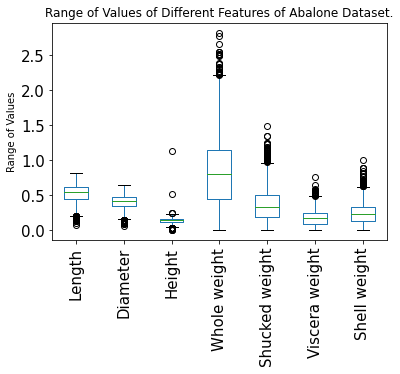

In [22]:
pd.plotting.boxplot(abalone_data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']], column=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight'], grid=False, rot=90, fontsize=15);
plt.title("Range of Values of Different Features of Abalone Dataset.")
plt.ylabel("Range of Values");
print("Boxplot indicating range")

As, we can see there is differences in the ranges of values of different features. 

For instance, the `Whole weight` feature has values in the range of 0-3. Whereas all other features are within the range of 1.5 value.

# Let's Normalize the data using MinMax Normalization.

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(abalone_data.drop(columns=['Sex', 'Rings'], axis=1))

In [25]:
minmax_abalone_data = pd.DataFrame(scaled_data) 
minmax_abalone_data.columns = feature_columns_without_ordinal_column
minmax_abalone_data[target_column] = abalone_data[target_column]
minmax_abalone_data[ordinal_column] = abalone_data[ordinal_column]
minmax_abalone_data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex
0,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,7,M
1,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,9,F
2,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,10,M
3,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,7,I
4,0.472973,0.411765,0.084071,0.123783,0.094149,0.101382,0.118087,8,I
...,...,...,...,...,...,...,...,...,...
4171,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637,11,F
4172,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097,10,M
4173,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431,9,M
4174,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473,10,F


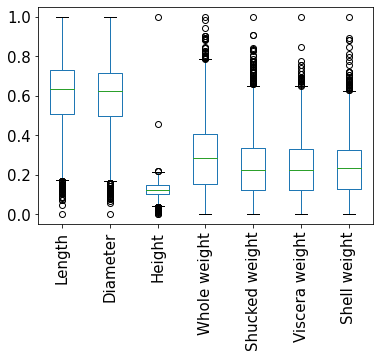

In [26]:
# Let's try to plot the boxplot first.
pd.plotting.boxplot(minmax_abalone_data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']], column=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight'], grid=False, rot=90, fontsize=15);


## Observations after Normalizing the Data as compared to UnNormalized Data :


### 6 (a) : Is normalization necessary for this dataset given what you’ve seen? Explain briefly why.

Refer to the above `Boxplot` figure. The normalization technique is used to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For example: If one feature has range of values from 100-10K while other feature has values in the range of 10-100 and another feature has values in the range of 1-10, it is preferred to normalise the data. In this case

In the given abalone dataset, the range of values for the features are almost similar except for the `Whole weight` feature. But even then it's range is not highly different than that of other features. 

# Similarly Normalizing the Data using Z score Normalization.

In [68]:
from scipy import stats

In [69]:
zscore_abalone_data = abalone_data.drop(columns=['Sex', 'Rings'], axis=1).apply(stats.zscore)
zscore_abalone_data.columns = feature_columns_without_ordinal_column
zscore_abalone_data[target_column] = abalone_data[target_column]
zscore_abalone_data[ordinal_column] = abalone_data[ordinal_column]
zscore_abalone_data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex
0,-1.449007,-1.439892,-1.184252,-1.230344,-1.170967,-1.205327,-1.213054,7,M
1,0.049892,0.122015,-0.108247,-0.309601,-0.463610,-0.356844,-0.207277,9,F
2,-0.699558,-0.432210,-0.347360,-0.637928,-0.648334,-0.607739,-0.602404,10,M
3,-1.615552,-1.540661,-1.423364,-1.272150,-1.216022,-1.287438,-1.320816,7,I
4,-0.824466,-1.087204,-1.064696,-0.973393,-0.983991,-0.940746,-0.853848,8,I
...,...,...,...,...,...,...,...,...,...
4171,0.341344,0.424320,0.609089,0.118651,0.047759,0.532696,0.072904,11,F
4172,0.549524,0.323551,-0.108247,0.279756,0.358635,0.309170,0.155521,10,M
4173,0.632797,0.676240,1.565537,0.708009,0.748357,0.975184,0.496767,9,M
4174,0.840977,0.777008,0.250421,0.541806,0.773137,0.733412,0.410557,10,F


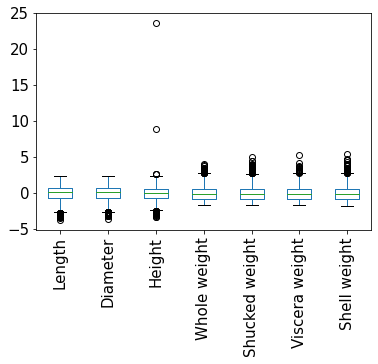

In [70]:
# Let's try to plot the boxplot first.
pd.plotting.boxplot(zscore_abalone_data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']], column=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight'], grid=False, rot=90, fontsize=15);

# Using Original Dataset

Firstly, we will compare the features of the Original data.

Figure 1 :  Comparision of features on UnNormalized Data


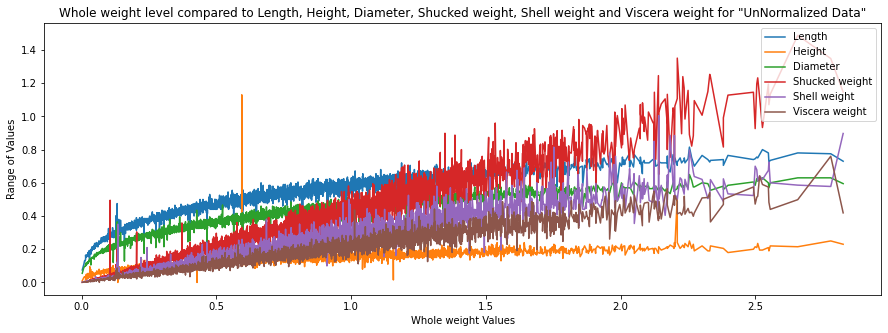

In [71]:
print(f"Figure 1 :  Comparision of features on UnNormalized Data")
x = ['Whole weight']
y = ['Length', 'Height', 'Diameter', 'Shucked weight', 'Shell weight', 'Viscera weight']
abalone_data_feature_comparision = abalone_data[x+y]
abalone_data_feature_comparision.sort_values(by=x, inplace=True)
abalone_data_feature_comparision.plot(x=x[0], y=y, figsize=(15,5))
plt.legend(loc='upper right')
plt.title('{} level compared to {}, {}, {}, {}, {} and {} for "UnNormalized Data"'.format(x[0],y[0], y[1], y[2], y[3], y[4], y[5]))
plt.xlabel('Whole weight Values')
plt.ylabel('Range of Values')
plt.legend(loc='upper right');

Now, we will compare the features on Normalized data.



# Using MinMax Normalized Data

Min-max normalization is one of the most common ways to normalize data. For every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1.

Figure 2 :  Comparision of features on Min-Max Normalized Data


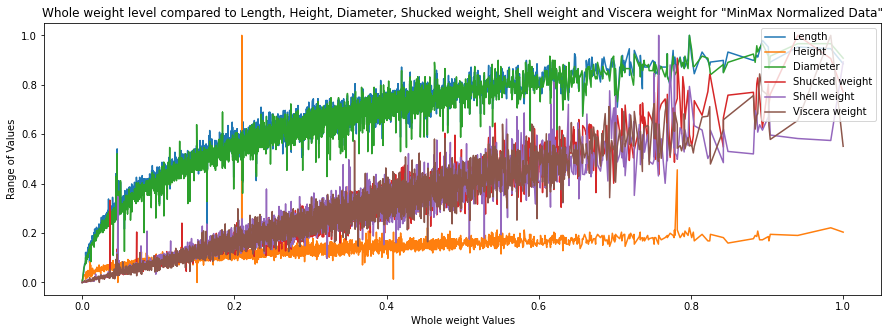

In [72]:
print(f"Figure 2 :  Comparision of features on Min-Max Normalized Data")
x = ['Whole weight']
y = ['Length', 'Height', 'Diameter', 'Shucked weight', 'Shell weight', 'Viscera weight']
minmax_abalone_data_feature_comparision = minmax_abalone_data[x+y]
minmax_abalone_data_feature_comparision.sort_values(by=x, inplace=True)
minmax_abalone_data_feature_comparision.plot(x=x[0], y=y, figsize=(15,5))
plt.legend(loc='upper right')
plt.title('{} level compared to {}, {}, {}, {}, {} and {} for "MinMax Normalized Data"'.format(x[0],y[0], y[1], y[2], y[3], y[4], y[5]))
plt.ylabel('Range of Values')
plt.xlabel('Whole weight Values')
plt.legend(loc='upper right');

### 6 (b) : Using the min-max normalized data, pick two or three numeric features of your own choosing and compare the interaction between the variables and how it differs from the unnormalized data.

Above figures, Figure 1 (for UnNormalized data) and Figure 2 (for Normalized data using Min-Max Normalized data) shows the interaction between different features with `Whole weight` feature.

- In Figure 1, we can see that values of all the features increase as value of the `Whole weight` feature increases. For example : As the value of `Height`, `Length` and `Diameter` increases, the value of `Whole weight` also increases. We can relate this with human body as well, the person who is tall and broader has more weight compared to short and thinner person. 


- In Figure 2, after min-max normalization we can say that `Length` and `Diameter` increases in almost exactly similar manner when `Whole weight` increases. Similar is the cases for features `Viscera weight`, `Shell weight` and `Shucked weight`.


- One more interesting discovery for the `Height` feature is the detection of two abnormal values (can be considered as Outliers) ie. when `Whole weight` value is 0.2 and slightly less than 0.8, the value for `Height` is drastically different which is 1 and 0.4 respectively.



# Using Z-Score Normalized Data

Z-score normalization refers to the process of normalizing every value in a dataset such that the mean of all of the values is 0 and the standard deviation is 1.

Figure 3 : Comparision of features on Z-Score Normalized Data


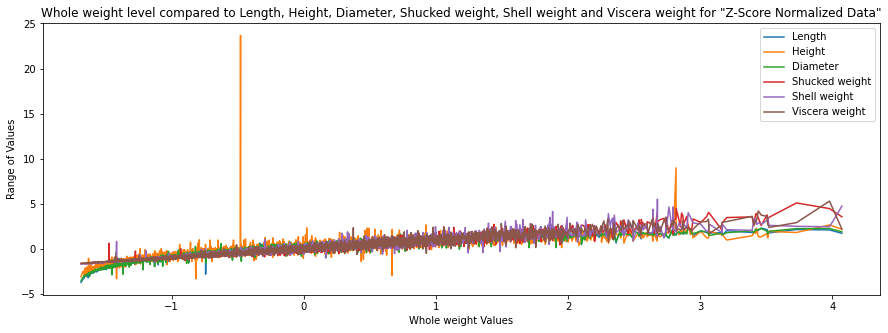

In [73]:
print(f"Figure 3 : Comparision of features on Z-Score Normalized Data")
x = ['Whole weight']
y = ['Length', 'Height', 'Diameter', 'Shucked weight', 'Shell weight', 'Viscera weight']
zscore_abalone_data_feature_comparision = zscore_abalone_data[x+y]
zscore_abalone_data_feature_comparision.sort_values(by=x, inplace=True)
zscore_abalone_data_feature_comparision.plot(x=x[0], y=y, figsize=(15,5))
plt.title('{} level compared to {}, {}, {}, {}, {} and {} for "Z-Score Normalized Data"'.format(x[0],y[0], y[1], y[2], y[3], y[4], y[5]))
plt.ylabel('Range of Values')
plt.xlabel('Whole weight Values')
plt.legend(loc='upper right');

In [74]:
# Querying Some Outliers from the Data

zscore_abalone_data[zscore_abalone_data['Height'] > 3]

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex
1416,1.507154,1.583154,8.978014,2.816643,3.370532,2.790756,1.962327,10,M
2050,-0.574650,-0.532978,23.683410,-0.478863,-0.123449,-0.589492,-0.756862,8,F


### 6 (c) : Now perform the same analysis but for the data with z-score normalization.

After performing the same analysis, from Figure 3 (for the Z-Score normalized data) we can say that every feature shows upward trend with the increase of `Whole weight` feature, but in almost exact similar manner. The two spikes for the `Height` feature shows the possible Outlier values, which are further shown by Querying the dataset in above cell. 


# Classification using KNearestNeighbors Classifier (Abalone Dataset)

Firstly, we will encode the ordinal feature `Sex`.

In [75]:
encoded_sex_feature = pd.get_dummies(zscore_abalone_data['Sex'])
zscore_abalone_data = zscore_abalone_data.drop('Sex',axis = 1)
zscore_abalone_data = zscore_abalone_data.join(encoded_sex_feature)
zscore_abalone_data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,-1.449007,-1.439892,-1.184252,-1.230344,-1.170967,-1.205327,-1.213054,7,0,0,1
1,0.049892,0.122015,-0.108247,-0.309601,-0.463610,-0.356844,-0.207277,9,1,0,0
2,-0.699558,-0.432210,-0.347360,-0.637928,-0.648334,-0.607739,-0.602404,10,0,0,1
3,-1.615552,-1.540661,-1.423364,-1.272150,-1.216022,-1.287438,-1.320816,7,0,1,0
4,-0.824466,-1.087204,-1.064696,-0.973393,-0.983991,-0.940746,-0.853848,8,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4171,0.341344,0.424320,0.609089,0.118651,0.047759,0.532696,0.072904,11,1,0,0
4172,0.549524,0.323551,-0.108247,0.279756,0.358635,0.309170,0.155521,10,0,0,1
4173,0.632797,0.676240,1.565537,0.708009,0.748357,0.975184,0.496767,9,0,0,1
4174,0.840977,0.777008,0.250421,0.541806,0.773137,0.733412,0.410557,10,1,0,0


In [76]:
# Importing the required libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

Below is the code for a function, that returns various scores for the different evaluation metrics used for knowing the performance of the Classifier model.

In [77]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparisons on y_true v/s y_preds on a classification model.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds, average='weighted')
    recall = recall_score(y_true, y_preds, average='weighted')
    f1 = f1_score(y_true, y_preds, average='weighted')
    
    metric_dict = {"accuracy" : round(accuracy,2),
                  "precision" : round(precision,2),
                  "recall" : round(recall, 2),
                  "f1 score" : round(f1, 2)}
    
    print(f"Accuracy : {accuracy * 100:.2f}%")
    print(f"Precision : {precision:.2f}")
    print(f"Recall : {recall:.2f}")
    print(f"F1 Score : {f1:.2f}")
    
    return metric_dict


# Dividing the data into training and test set


### 2.1 : Divide the data into a training set and a test set (80%, 20%) Note: set the random seed for splitting, use random state=27 in the sci-kit learn train test split function to get the same split every time you run the program.

In [78]:
from sklearn.model_selection import train_test_split
X=zscore_abalone_data.drop("Rings", axis = 1)
y=zscore_abalone_data["Rings"]
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

'train_test_split' takes in 5 parameters. The first two parameters are the input and target data we split up earlier. Next, we will set ‘test_size’ to 0.2. This means that 20% of all the data will be used for testing, which leaves 80% of the data as training data for the model to learn from. Setting ‘random_state’ to 27 ensures that we get the same split each time so we can reproduce our results.

# Training the model

### 2.2 : Start by training the model with the classifier’s default parameters. Use the train set and test the model on the test set. Note that different values of k will lead to different results.

In [79]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier()
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier()

Now let’s see how our accurate our model is on the full test set. To do this, we will use the ‘score’ function and pass in our test input and target data to see how well our model predictions match up to the actual results.

In [80]:
# Check accuracy of our model on the test data
print("The accuracy of the test set is: ",knn.score(X_test, y_test)*100)

The accuracy of the test set is:  22.727272727272727


Lets check the accuracy for K=6

In [81]:
knn = KNeighborsClassifier(n_neighbors=6)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [82]:
print("The accuracy of the test set is: ",knn.score(X_test, y_test)*100)

The accuracy of the test set is:  24.2822966507177


It is observed that the accuracy is increased.

Thus, by selecting different values of `k` we get different accuracy. This is known as Hyperparameter tuning.


# Finding optimum values of K

### 2.3 : To find the best value for k, you need to compute accuracy for a range of values of k so you can “tune” the classifier. Using these scores, plot a figure of accuracy vs k. Report the best k in terms of classification accuracy.

In [83]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 30)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid)
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [84]:
# This will give the best n_neighbors parameter value that fits the data better.
knn_gscv.best_params_

{'n_neighbors': 23}

In [85]:
print(f"The training set accuracy for the optimum value of 'k' in the range of (1,30) was {knn_gscv.best_score_ * 100} and the optimum 'k' value is {knn_gscv.best_params_['n_neighbors']}")

The training set accuracy for the optimum value of 'k' in the range of (1,30) was 25.74850299401198 and the optimum 'k' value is 23


In [86]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)
print("The accuracy of the test set is: ",knn.score(X_test, y_test)*100)

The accuracy of the test set is:  26.794258373205743


By performing GridSearch over different values of `k` over the range of 1-30. We found the optimum value of `k` which was 23. 

Thus, different `k` values can result in different accuracy for the classifier model.

# Plotting the Accuracy vs K plot, for different values of K.

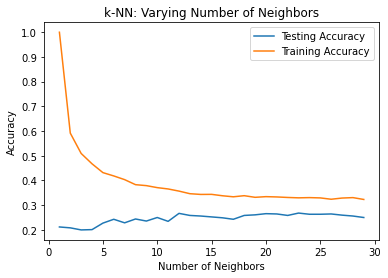

In [87]:
no_neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Visualization of k values vs accuracy

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Above plot shows the different accuracies achieved on different `k` values. 

As we can see at `k` values greater than 20, the training and test set accuracies seem to converge which means that k > 20 seems to be a good value for hyperparamter n_neighbors.

### A more exhaustive search for finding better hyperparameter settings 

In [88]:
# Let's apply some exhaustive search for best hyperparameters using GridSearchCV.
grid = {"n_neighbors" : np.arange(10,60,10),
          "weights" : ['uniform', 'distance'],
          "leaf_size" : [15,30],
          "p" : [1,2]}

In [89]:
from sklearn.model_selection import GridSearchCV

np.random.seed(27)

# Split into X and y
X = zscore_abalone_data.drop("Rings", axis=1)
y = zscore_abalone_data["Rings"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the Random Forest Classifier, n_jobs set how many of your computer processors you want to dedicate to this model. "-1" means all
clf = KNeighborsClassifier(n_jobs=-1)

# Set up GridSearchCV
gs_knn_clf = GridSearchCV(estimator=clf,
                     param_grid=grid,
            
                     verbose=2)

# Fit the GridSearchCV version of classifier
gs_knn_clf.fit(X_train, y_train);


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .leaf_size=15, n_neighbors=10, p=1, weights=uniform; total time=   0.1s
[CV] END .leaf_size=15, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END .leaf_size=15, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END .leaf_size=15, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END .leaf_size=15, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END leaf_size=15, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=15, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END .leaf_size=15, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END .leaf_size=15, n_neighbors=10, p=2, we

[CV] END leaf_size=30, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END leaf_size=30, n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END .leaf_size=30, n_neighbors=10, p=2, weights=uniform; total time=   0.1s
[CV] END .leaf_size=30, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END .leaf_size=30, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END .leaf_size=30, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END .leaf_size=30, n_neighbors=10, p=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END leaf_size=30, n_neighbors=10, p=2, weights=distance; total time=   0.0s
[CV] END .leaf_size=30, n_ne

In [90]:
gs_knn_clf.best_params_

{'leaf_size': 15, 'n_neighbors': 50, 'p': 1, 'weights': 'uniform'}

In [91]:
gs_knn_clf.best_score_

0.26347305389221554

In [92]:
y_preds = gs_knn_clf.predict(X_test)
metrics = evaluate_preds(y_test, y_preds)
metrics

Accuracy : 28.59%
Precision : 0.25
Recall : 0.29
F1 Score : 0.26


{'accuracy': 0.29, 'precision': 0.25, 'recall': 0.29, 'f1 score': 0.26}

# Improving on KNN: 

### 2.4 : You can try to improve on your classification results using the method of weighted KNN. The KNeighborsClassifier class has an option for weighted KNN where points that are nearby to the query point are more important for the classification than others. Compare the three different weighting schemes (default, manhatten, euclidean) by plotting accuracy vs k for all three of them on the same figure to see the effect.

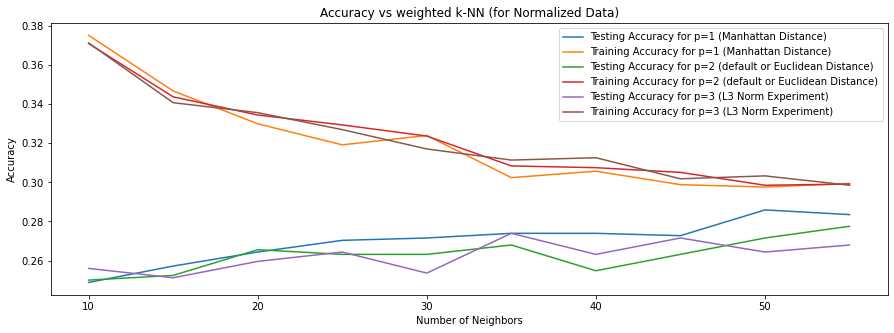

In [93]:
no_neighbors = np.arange(10, 60, 5)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))
train_accuracy1 = np.empty(len(no_neighbors))
test_accuracy1 = np.empty(len(no_neighbors))
train_accuracy2 = np.empty(len(no_neighbors))
test_accuracy2 = np.empty(len(no_neighbors))
train_accuracy3 = np.empty(len(no_neighbors))
test_accuracy3 = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    #for j in distance_metric:

    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)



    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)



    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

    knn1 = KNeighborsClassifier(n_neighbors=k,p=1)
    # Fit the classifier to the training data
    knn1.fit(X_train,y_train)



    # Compute accuracy on the training set
    train_accuracy1[i] = knn1.score(X_train, y_train)



    # Compute accuracy on the testing set
    test_accuracy1[i] = knn1.score(X_test, y_test)

    knn2 = KNeighborsClassifier(n_neighbors=k,p=2)
    # Fit the classifier to the training data
    knn2.fit(X_train,y_train)



    # Compute accuracy on the training set
    train_accuracy2[i] = knn2.score(X_train, y_train)



    # Compute accuracy on the testing set
    test_accuracy2[i] = knn2.score(X_test, y_test)
    
    knn3 = KNeighborsClassifier(n_neighbors=k,p=3)
    # Fit the classifier to the training data
    knn3.fit(X_train,y_train)



    # Compute accuracy on the training set
    train_accuracy3[i] = knn3.score(X_train, y_train)



    # Compute accuracy on the testing set
    test_accuracy3[i] = knn3.score(X_test, y_test)



# Visualization of k values vs accuracy

plt.figure(figsize=(15,5))

plt.title('Accuracy vs weighted k-NN (for Normalized Data)')
plt.plot(no_neighbors, test_accuracy1, label = 'Testing Accuracy for p=1 (Manhattan Distance)')
plt.plot(no_neighbors, train_accuracy1, label = 'Training Accuracy for p=1 (Manhattan Distance)')
plt.plot(no_neighbors, test_accuracy2, label = 'Testing Accuracy for p=2 (default or Euclidean Distance)')
plt.plot(no_neighbors, train_accuracy2, label = 'Training Accuracy for p=2 (default or Euclidean Distance)')
plt.plot(no_neighbors, test_accuracy3, label = 'Testing Accuracy for p=3 (L3 Norm Experiment)')
plt.plot(no_neighbors, train_accuracy3, label = 'Training Accuracy for p=3 (L3 Norm Experiment)')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy');


# Ablation Study on Normalization 


In [94]:
encoded_sex_feature = pd.get_dummies(abalone_data['Sex'])
abalone_data = abalone_data.drop('Sex',axis = 1)
abalone_data = abalone_data.join(encoded_sex_feature)
abalone_data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4171,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4172,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4173,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4174,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [95]:
from sklearn.model_selection import train_test_split
X=abalone_data.drop("Rings", axis = 1)
y=abalone_data["Rings"]
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

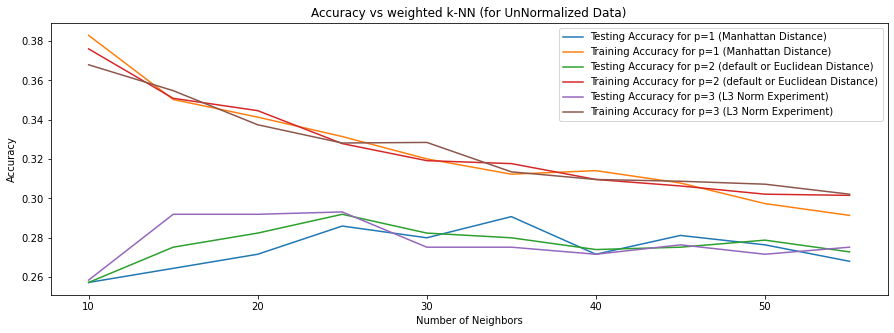

In [96]:
no_neighbors = np.arange(10, 60, 5)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))
train_accuracy1 = np.empty(len(no_neighbors))
test_accuracy1 = np.empty(len(no_neighbors))
train_accuracy2 = np.empty(len(no_neighbors))
test_accuracy2 = np.empty(len(no_neighbors))
train_accuracy3 = np.empty(len(no_neighbors))
test_accuracy3 = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    #for j in distance_metric:

    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)



    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)



    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

    knn1 = KNeighborsClassifier(n_neighbors=k,p=1)
    # Fit the classifier to the training data
    knn1.fit(X_train,y_train)



    # Compute accuracy on the training set
    train_accuracy1[i] = knn1.score(X_train, y_train)



    # Compute accuracy on the testing set
    test_accuracy1[i] = knn1.score(X_test, y_test)

    knn2 = KNeighborsClassifier(n_neighbors=k,p=2)
    # Fit the classifier to the training data
    knn2.fit(X_train,y_train)



    # Compute accuracy on the training set
    train_accuracy2[i] = knn2.score(X_train, y_train)



    # Compute accuracy on the testing set
    test_accuracy2[i] = knn2.score(X_test, y_test)
    
    knn3 = KNeighborsClassifier(n_neighbors=k,p=3)
    # Fit the classifier to the training data
    knn3.fit(X_train,y_train)



    # Compute accuracy on the training set
    train_accuracy3[i] = knn3.score(X_train, y_train)



    # Compute accuracy on the testing set
    test_accuracy3[i] = knn3.score(X_test, y_test)



# Visualization of k values vs accuracy

plt.figure(figsize=(15,5))

plt.title('Accuracy vs weighted k-NN (for UnNormalized Data)')
plt.plot(no_neighbors, test_accuracy1, label = 'Testing Accuracy for p=1 (Manhattan Distance)')
plt.plot(no_neighbors, train_accuracy1, label = 'Training Accuracy for p=1 (Manhattan Distance)')
plt.plot(no_neighbors, test_accuracy2, label = 'Testing Accuracy for p=2 (default or Euclidean Distance)')
plt.plot(no_neighbors, train_accuracy2, label = 'Training Accuracy for p=2 (default or Euclidean Distance)')
plt.plot(no_neighbors, test_accuracy3, label = 'Testing Accuracy for p=3 (L3 Norm Experiment)')
plt.plot(no_neighbors, train_accuracy3, label = 'Training Accuracy for p=3 (L3 Norm Experiment)')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy');



### 2.5 : An ablation study is where some aspect of the model or analysis is dropped, in order to see what its effect was on the entire outcome. We can do a simple form of ablation here by removing normalization from our pipeline. Replot the three curves from the previous question on weighted KNN, but this time remove the normalization step from the preprocessing. Comment on the difference, was normalization effective or necessary in this case?

From the above figure and the figure obtained in 2.4 (Improving our KNN), it is evident that for both Normalized and UnNormalized data. There is no major difference between the Accuracy obtained for different hyperparamter tunnings for `weighted KNN`. This can be because the ranges of the feature columns weren't very different from each other. 


Thus for this dataset, normalization did only a little impact in improving the Accuracy compared to UnNormalized data.

# Dataset 2 : (Wine Quality Dataset)


### Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.

Attribute Information:

Input variables (based on physicochemical tests):

- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol
- 12 - color (1 for red and 0 for white wine)
- 13 - quality (score between 0 and 10)

# Loading the Dataset

In [97]:
red_wine_dataset = pd.read_csv("winequality-red.csv", sep=";")

white_wine_dataset = pd.read_csv("winequality-white.csv", sep=";")

In [98]:
red_wine_dataset['color'] = np.ones(shape = red_wine_dataset.shape[0],dtype=int)

white_wine_dataset['color'] = np.zeros(shape= white_wine_dataset.shape[0], dtype=int)

In [99]:
wine_dataset = pd.concat([red_wine_dataset, white_wine_dataset])

In [100]:
wine_dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

In [101]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [102]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [103]:
zscore_wine_data = wine_dataset.drop(['color','quality'], axis=1).apply(stats.zscore)
zscore_wine_data['color'] = wine_dataset['color']
zscore_wine_data['quality'] = wine_dataset['quality']
zscore_wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,quality
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,1,5
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,1,5
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,1,5
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,1,6
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.783214,-0.787650,-0.197054,-0.807837,-0.486252,-0.367664,-0.420128,-1.186161,0.320319,-0.210144,0.593818,0,6
4894,-0.474652,-0.119460,0.284686,0.537425,-0.257883,1.491697,0.924588,0.067824,-0.426067,-0.478971,-0.747766,0,5
4895,-0.551792,-0.605417,-0.885253,-0.891916,-0.429160,-0.029599,-0.083949,-0.719251,-1.421248,-0.478971,-0.915464,0,6
4896,-1.323198,-0.301694,-0.128234,-0.912936,-0.971538,-0.593041,-0.101642,-2.003251,0.755710,-1.016626,1.935402,0,7


# Dividing the data into training and test set

### 2.1 Divide the data into a training set and a test set (80%, 20%) Note: set therandom seed for splitting, use random state=27 in the sci-kit learn train test split function to get the same split every time you run the program.

In [104]:
from sklearn.model_selection import train_test_split
X= zscore_wine_data.drop("quality", axis = 1)
y= zscore_wine_data["quality"]
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

'train_test_split' takes in 5 parameters. The first two parameters are the input and target data we split up
earlier. Next, we will set ‘test_size’ to 0.2. This means that 20% of all the data will be used for testing, which
leaves 80% of the data as training data for the model to learn from. Setting ‘random_state’ to 27 ensures that
we get the same split each time so we can reproduce our results.

# Training the model

### 2.2 : Start by training the model with the classifier’s default parameters. Use the train set and test the model on the test set. Note that different values of k will lead to different results.

In [105]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier()
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier()

Now let’s see how our accurate our model is on the full test set. To do this, we will use the ‘score’ function and
pass in our test input and target data to see how well our model predictions match up to the actual results

In [106]:
# Check accuracy of our model on the test data
print("The accuracy of the test set is: ",knn.score(X_test, y_test)*100)


The accuracy of the test set is:  55.15384615384615


Lets check the accuracy for K=6

In [107]:
knn = KNeighborsClassifier(n_neighbors=6)
# Fit the classifier to the data
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=6)

In [108]:
print("The accuracy of the test set is: ",knn.score(X_test, y_test)*100)


The accuracy of the test set is:  55.00000000000001


It is observed that the accuracy is decreased.

Thus, by selecting different values of k we get different accuracy. This is known as Hyperparameter tuning

# Finding optimum values of K

### 2.3 : To find the best value for k, you need to compute accuracy for a range of values of k so you can “tune” the classifier. Using these scores, plot a figure of accuracy vs k. Report the best k in terms of classification accuracy.

In [109]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 30)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid)
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [110]:
# This will give the best n_neighbors parameter value that fits the data better.
knn_gscv.best_params_

{'n_neighbors': 1}

In [111]:
print(f"The training set accuracy for the optimum value of 'k' in the range of (1,30) was {knn_gscv.best_score_ * 100} and the optimum 'k' value is {knn_gscv.best_params_['n_neighbors']}")

The training set accuracy for the optimum value of 'k' in the range of (1,30) was 60.07268453394536 and the optimum 'k' value is 1


In [112]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print("The accuracy of the test set is: ",knn.score(X_test, y_test)*100)

The accuracy of the test set is:  62.61538461538462


By performing GridSearch over different values of k over the range of 1-30. We found the optimum value of k which was 1.
Thus, different k values can result in different accuracy for the classifier model.

# Plotting the Accuracy vs K plot, for different values of K.

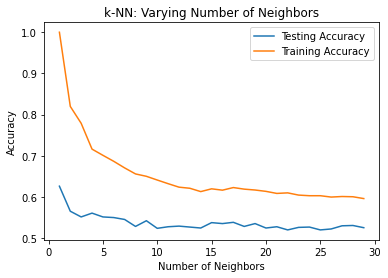

In [113]:
no_neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))
for i, k in enumerate(no_neighbors):
 # We instantiate the classifier
 knn = KNeighborsClassifier(n_neighbors=k)
 # Fit the classifier to the training data
 knn.fit(X_train,y_train)

 # Compute accuracy on the training set
 train_accuracy[i] = knn.score(X_train, y_train)
 # Compute accuracy on the testing set
 test_accuracy[i] = knn.score(X_test, y_test)
# Visualization of k values vs accuracy
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


Above plot shows the different accuracies achieved on different k values.

As we can see at `k` values greater than 15, the training and test set accuracies seem to converge which means that k > 15 seems to be a good value for hyperparamter n_neighbors.

### A more exhaustive search for finding better hyperparameter settings


In [114]:
# Let's apply some exhaustive search for best hyperparameters using GridSearchCV
grid = {"n_neighbors" : np.arange(10,60,10),
 "weights" : ['uniform', 'distance'],
 "leaf_size" : [15,30],
 "p" : [1,2]}


In [115]:
from sklearn.model_selection import GridSearchCV

np.random.seed(27)

# Split into X and y
X = zscore_wine_data.drop(['quality'],axis=1)
y = zscore_wine_data['quality']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the Random Forest Classifier, n_jobs set how many of your computer processors you want to dedicate to this model. "-1" means all
clf = KNeighborsClassifier(n_jobs=-1)

# Set up GridSearchCV
gs_knn_clf = GridSearchCV(estimator=clf,
                     param_grid=grid,
            
                     verbose=2)

# Fit the GridSearchCV version of classifier
gs_knn_clf.fit(X_train, y_train);


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .leaf_size=15, n_neighbors=10, p=1, weights=uniform; total time=   0.2s
[CV] END .leaf_size=15, n_neighbors=10, p=1, weights=uniform; total time=   0.3s
[CV] END .leaf_size=15, n_neighbors=10, p=1, weights=uniform; total time=   0.2s
[CV] END .leaf_size=15, n_neighbors=10, p=1, weights=uniform; total time=   0.1s
[CV] END .leaf_size=15, n_neighbors=10, p=1, weights=uniform; total time=   0.1s
[CV] END leaf_size=15, n_neighbors=10, p=1, weights=distance; total time=   0.1s
[CV] END leaf_size=15, n_neighbors=10, p=1, weights=distance; total time=   0.1s
[CV] END leaf_size=15, n_neighbors=10, p=1, weights=distance; total time=   0.1s
[CV] END leaf_size=15, n_neighbors=10, p=1, weights=distance; total time=   0.1s
[CV] END leaf_size=15, n_neighbors=10, p=1, weights=distance; total time=   0.1s
[CV] END .leaf_size=15, n_neighbors=10, p=2, weights=uniform; total time=   0.3s
[CV] END .leaf_size=15, n_neighbors=10, p=2, we

[CV] END .leaf_size=30, n_neighbors=10, p=1, weights=uniform; total time=   0.1s
[CV] END .leaf_size=30, n_neighbors=10, p=1, weights=uniform; total time=   0.1s
[CV] END .leaf_size=30, n_neighbors=10, p=1, weights=uniform; total time=   0.1s
[CV] END .leaf_size=30, n_neighbors=10, p=1, weights=uniform; total time=   0.1s
[CV] END leaf_size=30, n_neighbors=10, p=1, weights=distance; total time=   0.1s
[CV] END leaf_size=30, n_neighbors=10, p=1, weights=distance; total time=   0.1s
[CV] END leaf_size=30, n_neighbors=10, p=1, weights=distance; total time=   0.1s
[CV] END leaf_size=30, n_neighbors=10, p=1, weights=distance; total time=   0.1s
[CV] END leaf_size=30, n_neighbors=10, p=1, weights=distance; total time=   0.1s
[CV] END .leaf_size=30, n_neighbors=10, p=2, weights=uniform; total time=   0.1s
[CV] END .leaf_size=30, n_neighbors=10, p=2, weights=uniform; total time=   0.1s
[CV] END .leaf_size=30, n_neighbors=10, p=2, weights=uniform; total time=   0.1s
[CV] END .leaf_size=30, n_ne

In [116]:
gs_knn_clf.best_params_


{'leaf_size': 15, 'n_neighbors': 40, 'p': 1, 'weights': 'distance'}

In [117]:
gs_knn_clf.best_score_


0.6615312430591545

In [118]:
y_preds = gs_knn_clf.predict(X_test)
metrics = evaluate_preds(y_test, y_preds)
metrics


Accuracy : 66.00%
Precision : 0.68
Recall : 0.66
F1 Score : 0.64


{'accuracy': 0.66, 'precision': 0.68, 'recall': 0.66, 'f1 score': 0.64}

# Improving on KNN: 

### 2.4 : You can try to improve on your classification results using the method of weighted KNN. The KNeighborsClassifier class has an option for weighted KNN where points that are nearby to the query point are more important for the classification than others. Compare the three different weighting schemes (default, manhatten, euclidean) by plotting accuracy vs k for all three of them on the same figure to see the effect.


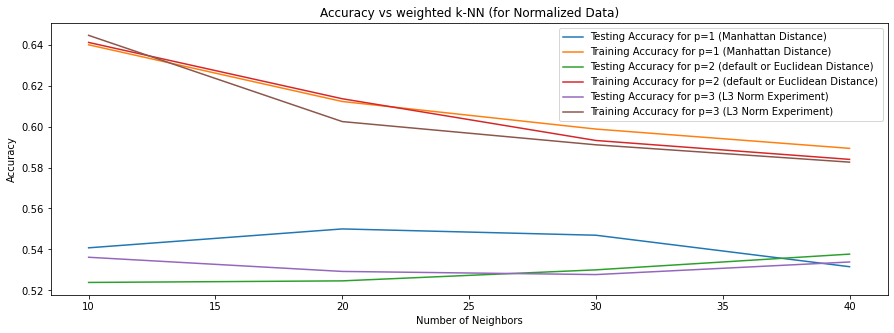

In [119]:
no_neighbors = np.arange(10, 50, 10)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))
train_accuracy1 = np.empty(len(no_neighbors))
test_accuracy1 = np.empty(len(no_neighbors))
train_accuracy2 = np.empty(len(no_neighbors))
test_accuracy2 = np.empty(len(no_neighbors))
train_accuracy3 = np.empty(len(no_neighbors))
test_accuracy3 = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    #for j in distance_metric:

    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)



    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)



    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

    knn1 = KNeighborsClassifier(n_neighbors=k,p=1)
    # Fit the classifier to the training data
    knn1.fit(X_train,y_train)



    # Compute accuracy on the training set
    train_accuracy1[i] = knn1.score(X_train, y_train)



    # Compute accuracy on the testing set
    test_accuracy1[i] = knn1.score(X_test, y_test)

    knn2 = KNeighborsClassifier(n_neighbors=k,p=2)
    # Fit the classifier to the training data
    knn2.fit(X_train,y_train)



    # Compute accuracy on the training set
    train_accuracy2[i] = knn2.score(X_train, y_train)



    # Compute accuracy on the testing set
    test_accuracy2[i] = knn2.score(X_test, y_test)
    
    knn3 = KNeighborsClassifier(n_neighbors=k,p=3)
    # Fit the classifier to the training data
    knn3.fit(X_train,y_train)



    # Compute accuracy on the training set
    train_accuracy3[i] = knn3.score(X_train, y_train)



    # Compute accuracy on the testing set
    test_accuracy3[i] = knn3.score(X_test, y_test)



# Visualization of k values vs accuracy

plt.figure(figsize=(15,5))

plt.title('Accuracy vs weighted k-NN (for Normalized Data)')
plt.plot(no_neighbors, test_accuracy1, label = 'Testing Accuracy for p=1 (Manhattan Distance)')
plt.plot(no_neighbors, train_accuracy1, label = 'Training Accuracy for p=1 (Manhattan Distance)')
plt.plot(no_neighbors, test_accuracy2, label = 'Testing Accuracy for p=2 (default or Euclidean Distance)')
plt.plot(no_neighbors, train_accuracy2, label = 'Training Accuracy for p=2 (default or Euclidean Distance)')
plt.plot(no_neighbors, test_accuracy3, label = 'Testing Accuracy for p=3 (L3 Norm Experiment)')
plt.plot(no_neighbors, train_accuracy3, label = 'Training Accuracy for p=3 (L3 Norm Experiment)')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy');

# Ablation Study on Normalization


In [120]:
# encoded_wine_feature = pd.get_dummies(wine_dataset['quality'])
# wine_dataset_unnormalized = wine_dataset.drop('qualtiy',axis = 1)
#wine_dataset_unnormalized = wine_dataset_unnormalized.join(encoded_wine_feature)
#wine_dataset_unnormalized
unnormalized_wine_data = wine_dataset.drop(['color','quality'], axis=1)
unnormalized_wine_data['color'] = wine_dataset['color']
unnormalized_wine_data['quality'] = wine_dataset['quality']
unnormalized_wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0,7


In [1]:
from sklearn.model_selection import train_test_split
X=unnormalized_wine_data.drop("quality", axis = 1)
y=unnormalized_wine_data["quality"]
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

NameError: name 'unnormalized_wine_data' is not defined

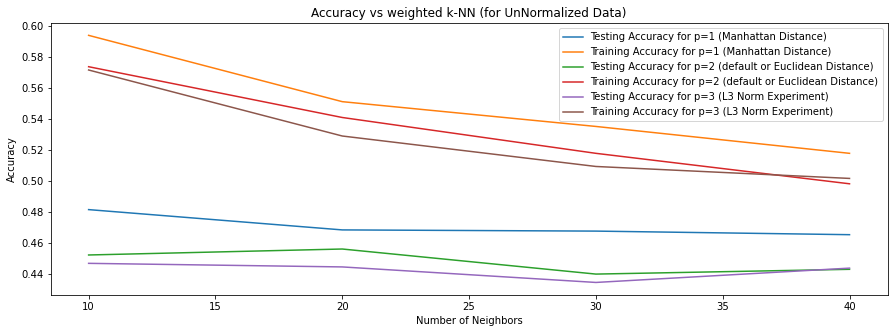

In [122]:
no_neighbors = np.arange(10, 50, 10)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))
train_accuracy1 = np.empty(len(no_neighbors))
test_accuracy1 = np.empty(len(no_neighbors))
train_accuracy2 = np.empty(len(no_neighbors))
test_accuracy2 = np.empty(len(no_neighbors))
train_accuracy3 = np.empty(len(no_neighbors))
test_accuracy3 = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    #for j in distance_metric:

    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)



    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)



    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

    knn1 = KNeighborsClassifier(n_neighbors=k,p=1)
    # Fit the classifier to the training data
    knn1.fit(X_train,y_train)



    # Compute accuracy on the training set
    train_accuracy1[i] = knn1.score(X_train, y_train)



    # Compute accuracy on the testing set
    test_accuracy1[i] = knn1.score(X_test, y_test)

    knn2 = KNeighborsClassifier(n_neighbors=k,p=2)
    # Fit the classifier to the training data
    knn2.fit(X_train,y_train)



    # Compute accuracy on the training set
    train_accuracy2[i] = knn2.score(X_train, y_train)



    # Compute accuracy on the testing set
    test_accuracy2[i] = knn2.score(X_test, y_test)
    
    knn3 = KNeighborsClassifier(n_neighbors=k,p=3)
    # Fit the classifier to the training data
    knn3.fit(X_train,y_train)



    # Compute accuracy on the training set
    train_accuracy3[i] = knn3.score(X_train, y_train)



    # Compute accuracy on the testing set
    test_accuracy3[i] = knn3.score(X_test, y_test)



# Visualization of k values vs accuracy

plt.figure(figsize=(15,5))

plt.title('Accuracy vs weighted k-NN (for UnNormalized Data)')
plt.plot(no_neighbors, test_accuracy1, label = 'Testing Accuracy for p=1 (Manhattan Distance)')
plt.plot(no_neighbors, train_accuracy1, label = 'Training Accuracy for p=1 (Manhattan Distance)')
plt.plot(no_neighbors, test_accuracy2, label = 'Testing Accuracy for p=2 (default or Euclidean Distance)')
plt.plot(no_neighbors, train_accuracy2, label = 'Training Accuracy for p=2 (default or Euclidean Distance)')
plt.plot(no_neighbors, test_accuracy3, label = 'Testing Accuracy for p=3 (L3 Norm Experiment)')
plt.plot(no_neighbors, train_accuracy3, label = 'Training Accuracy for p=3 (L3 Norm Experiment)')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy');

### 2.5 : An ablation study is where some aspect of the model or analysis is dropped, in order to see what its effect was on the entire outcome. We can do a simple form of ablation here by removing normalization from our pipeline. Replot the three curves from the previous question on weighted KNN, but this time remove the normalization step from the preprocessing. Comment on the difference, was normalization effective or necessary in this case?

From the above figure and the figure obtained in 2.4 (Improving our KNN), it is evident that for both Normalized and UnNormalized data. There is a difference between the Accuracy obtained for different hyperparamter tunnings for `weighted KNN`. This can be because the ranges of the feature columns different from each other for some of the features. 

For example ranges of `citric acid` and `volatile acidity` were very low. Whereas ranges of `total sulphur dioxide` and `free sulphur dioxide` features were very high. Thus, normalization was beneficial.

Thus, the accuracy on the "Test set" was about 0.45 for UnNormalized data. But it was about 0.55 for the "Test set" of data nornalized using Z-Score Normalization.

Thus for the wine dataset, normalization did an impact in improving the Accuracy compared to UnNormalized data.

# References


[1] Abalone Dataset [https://archive.ics.uci.edu/ml/datasets/abalone]

[2] Wine Quality Dataset [https://archive.ics.uci.edu/ml/datasets/wine+quality]

[3] KNN Neighbor Algorithm

- (a) [https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a]
    
- (b) [https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html]

- (c) [https://www.w3resource.com/machine-learning/scikit-learn/iris/python-machine-learning-k-nearest-neighbors-algorithm-exercise-8.php]

[4] Kaggle Notebooks Referred

-  Outlier Detection : [https://www.kaggle.com/nareshbhat/outlier-the-silent-killer]
    
-  EDA : 
    
    - (a) [https://www.kaggle.com/ragnisah/eda-abalone-age-prediction] 

    - (b) [https://www.kaggle.com/sanchitvj/abalone-age-prediction]
         
[5] Bivariate Analysis [https://www.w3resource.com/machine-learning/scikit-learn/iris/python-machine-learning-k-nearest-neighbors-algorithm-exercise-8.php]


[6] Outlier [https://en.wikipedia.org/wiki/Outlier]


[7] Grid Search CV [https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html]


[8] Min-Max Normalization [https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html]

[9] Z-Score Normalization [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html]
